In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv(r'C:\Users\jyoti\Downloads\email.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [5]:
df.drop(index = 5572,inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [8]:
df.duplicated().sum()

415

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


([<matplotlib.patches.Wedge at 0x25fcb03bf90>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43')])

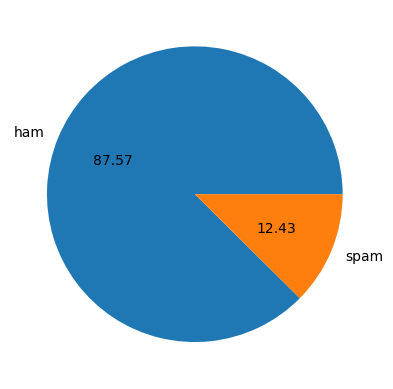

In [12]:
plt.pie(df['Category'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')

In [13]:
!pip install nltk

In [14]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['num_characters'] = df['Message'].apply(lambda x:len(x))

In [16]:
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [17]:
df['num_sentence'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
df.head()

,Category,Message,num_characters,num_words,num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


C:\Users\jyoti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


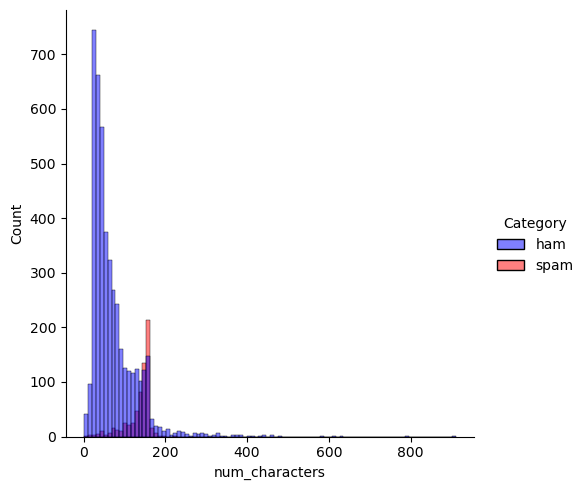

In [19]:
sns.displot(df,x = 'num_characters',hue = 'Category',palette = {'ham':'blue','spam':'red'})

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Category'] = encoder.fit_transform(df['Category'])


In [21]:
df.head()

,Category,Message,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

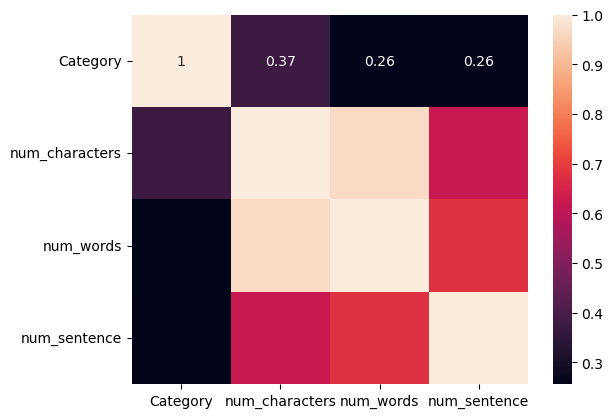

In [22]:
sns.heatmap(df.drop(['Message'],axis = 1).corr(),annot = True)

C:\Users\jyoti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jyoti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jyoti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


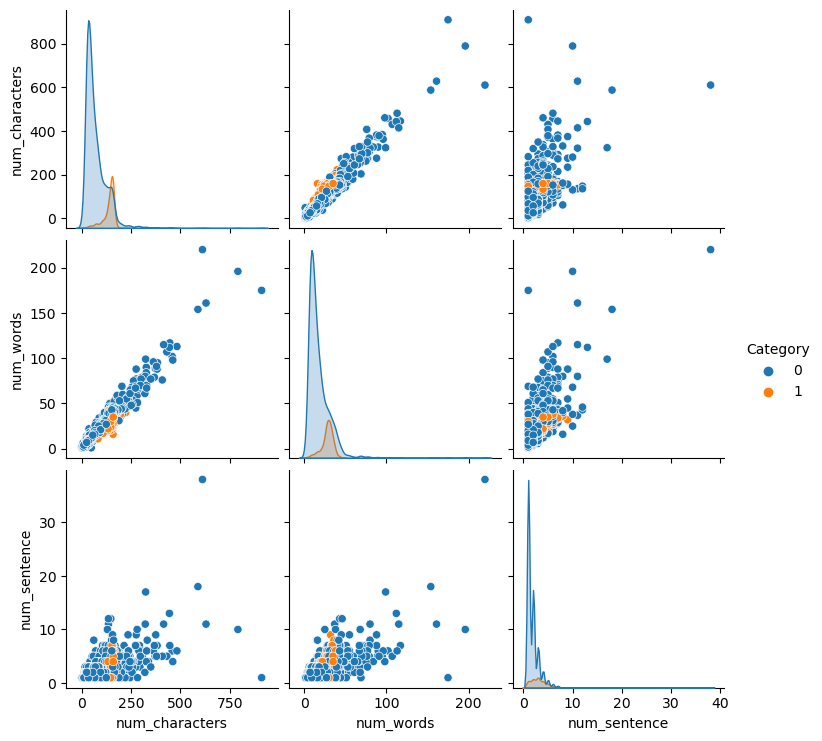

In [23]:
sns.pairplot(df,hue = 'Category')

In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
import string
from nltk.stem.porter import PorterStemmer
pst = PorterStemmer()


def transform(text):
    
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        
        if i.isalnum():
            y.append(i)
            
    z = []
            
    for i in y:
        if i not in (stopwords.words('english')) and (i not in string.punctuation):
            z.append(i)
            
    w = []
            
    for i in z:
        word = pst.stem(i)
        w.append(word)
    
            
    return " ".join(w)


In [26]:
transform("I'm gonna be home soon and Ai don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon ai want talk stuff anymor tonight k cri enough today'

In [27]:
df['Transformed_message'] = df['Message'].apply(transform)

In [28]:
df.head()

,Category,Message,num_characters,num_words,num_sentence,Transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500)

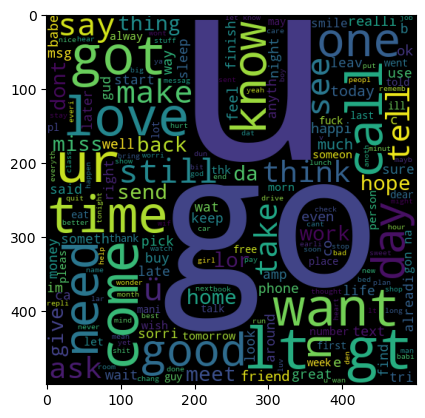

In [31]:
wc.generate(df[df['Category']==0]['Transformed_message'].str.cat())
plt.imshow(wc)

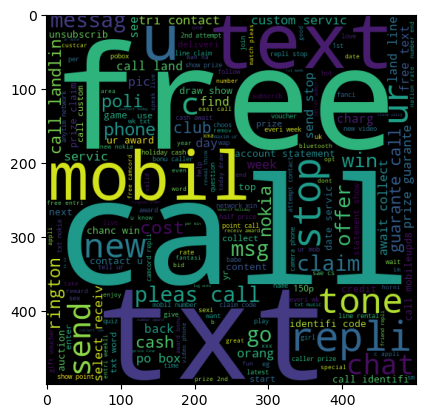

In [32]:
wc.generate(df[df['Category']==1]['Transformed_message'].str.cat())
plt.imshow(wc)

In [33]:
spam_corpus = []

for text in df[df['Category']==1]['Transformed_message'].tolist():
    for word in text.split():
        spam_corpus.append(word)

In [34]:
from collections import Counter

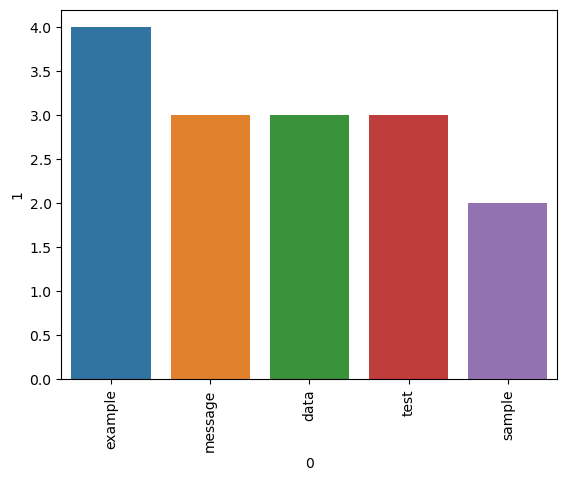

In [35]:
ham_corpus = [ 'message', 'data', 'sample', 'data', 'test', 'message', 'sample', 'example', 'test', 'example', 
 'test', 'data', 'message', 'example', 'example']


sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(15))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(15))[1])
plt.xticks(rotation = 90)
plt.show()

In [36]:
ham_corpus = []

for text in df[df['Category']==0]['Transformed_message'].tolist():
    for word in text.split():
        ham_corpus.append(word)

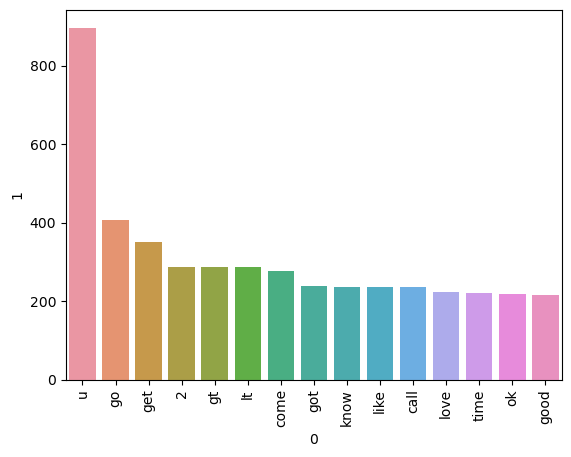

In [37]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(15))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(15))[1])
plt.xticks(rotation = 90)
plt.show()

In [38]:
df.head()

,Category,Message,num_characters,num_words,num_sentence,Transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer(max_features = 2500)

X = cv.fit_transform(df['Transformed_message']).toarray()
y = df['Category']

In [40]:
X.shape

(5157, 2500)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score

naive_bayes = {
    'GaussianNB' : GaussianNB(),
    'BernoulliNB' : BernoulliNB(),
    'MultinomialNB' : MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'ExtraTreesClassifier':ExtraTreesClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'XGBClassifier':XGBClassifier()
}

In [43]:
def predict(name,algo):
    
    model = algo
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [44]:
algorithms = []
accuracy = []
precision = []
for name,algo in naive_bayes.items():
    acc,prec = predict(name,algo)
    algorithms.append(name)
    accuracy.append(acc)
    precision.append(prec)
    print(f"Acc of {name} after max_features is {acc}")
    print(f"Precison of {name} after max_features is {prec}")
    print("\n")

Acc of GaussianNB after max_features is 0.8713278495887191
Precison of GaussianNB after max_features is 0.5


Acc of BernoulliNB after max_features is 0.981786133960047
Precison of BernoulliNB after max_features is 0.9795918367346939


Acc of MultinomialNB after max_features is 0.9764982373678026
Precison of MultinomialNB after max_features is 0.8874458874458875


Acc of KNN after max_features is 0.9171562867215041
Precison of KNN after max_features is 0.9875


Acc of ExtraTreesClassifier after max_features is 0.9764982373678026
Precison of ExtraTreesClassifier after max_features is 0.949748743718593


Acc of RandomForestClassifier after max_features is 0.9753231492361927
Precison of RandomForestClassifier after max_features is 0.9732620320855615


Acc of XGBClassifier after max_features is 0.9770857814336075
Precison of XGBClassifier after max_features is 0.9455445544554455




In [45]:
scores = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy_CV': accuracy,
    'Precision_CV': precision
})
scores

,Algorithm,Accuracy_CV,Precision_CV
0,GaussianNB,0.871328,0.500000
1,BernoulliNB,0.981786,0.979592
2,MultinomialNB,0.976498,0.887446
3,KNN,0.917156,0.987500
4,ExtraTreesClassifier,0.976498,0.949749
5,RandomForestClassifier,0.975323,0.973262
6,XGBClassifier,0.977086,0.945545


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 2500)
X = tfidf.fit_transform(df['Transformed_message']).toarray()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
def predict2(name,algo):
    
    model = algo
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [49]:
algorithms = []
accuracy = []
precision = []
for name,algo in naive_bayes.items():
    acc2,prec2 = predict2(name,algo)
    algorithms.append(name)
    accuracy.append(acc2)
    precision.append(prec2)
    print(f"Acc of {name} after max_features is {acc2}")
    print(f"Precison of {name} after max_features is {prec2}")
    print("\n")

Acc of GaussianNB after max_features is 0.8666274970622797
Precison of GaussianNB after max_features is 0.4897435897435897


Acc of BernoulliNB after max_features is 0.981786133960047
Precison of BernoulliNB after max_features is 0.9795918367346939


Acc of MultinomialNB after max_features is 0.972972972972973
Precison of MultinomialNB after max_features is 0.9887005649717514


Acc of KNN after max_features is 0.9077555816686251
Precison of KNN after max_features is 1.0


Acc of ExtraTreesClassifier after max_features is 0.9782608695652174
Precison of ExtraTreesClassifier after max_features is 0.955


Acc of RandomForestClassifier after max_features is 0.9759106933019976
Precison of RandomForestClassifier after max_features is 0.9540816326530612


Acc of XGBClassifier after max_features is 0.9741480611045829
Precison of XGBClassifier after max_features is 0.926829268292683




In [50]:
scores['Accuracy_Tfidf'] = accuracy
scores['Precision_Tfidf'] = precision
scores

,Algorithm,Accuracy_CV,Precision_CV,Accuracy_Tfidf,Precision_Tfidf
0,GaussianNB,0.871328,0.500000,0.866627,0.489744
1,BernoulliNB,0.981786,0.979592,0.981786,0.979592
2,MultinomialNB,0.976498,0.887446,0.972973,0.988701
3,KNN,0.917156,0.987500,0.907756,1.000000
4,ExtraTreesClassifier,0.976498,0.949749,0.978261,0.955000
5,RandomForestClassifier,0.975323,0.973262,0.975911,0.954082
6,XGBClassifier,0.977086,0.945545,0.974148,0.926829


In [51]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[
    ('BernoulliNB',BernoulliNB()),
    ('MultinomialNB',MultinomialNB()),
    ('KNN',KNeighborsClassifier())
],voting = 'soft')

vc.fit(X_train,y_train)

VotingClassifier(estimators=[('BernoulliNB', BernoulliNB()),
                             ('MultinomialNB', MultinomialNB()),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft')

In [52]:
y_pred3 = vc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9759106933019976
1.0


In [53]:
import joblib
from sklearn.ensemble import RandomForestClassifier

In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load your dataset
data = load_iris()  # Replace with your actual data loading method
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Example code for training the model
algo_model = RandomForestClassifier()
algo_model.fit(X_train, y_train)


RandomForestClassifier()

In [55]:
# Save the model to a file
joblib.dump(algo_model, 'random_forest_classifier_model.pkl')

['random_forest_classifier_model.pkl']

In [56]:
dir( 'random_forest_classifier_model.pkl')

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'stri

In [57]:
# Load the model from the file
loaded_model = joblib.load('random_forest_classifier_model.pkl')

In [58]:
predictions = loaded_model.predict(X_test)

In [59]:
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [60]:
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model
algo_model = RandomForestClassifier()
algo_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(algo_model, 'random_forest_classifier_model.pkl')

# Load the model from the file
loaded_model = joblib.load('random_forest_classifier_model.pkl')

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)

# Print predictions
print(predictions)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Assuming you have a list of processed messages for training
processed_messages = ["processed message 1", "processed message 2", "processed message 3"]  

# Initialize and fit the vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(processed_messages)

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Also save your trained model
from sklearn.ensemble import RandomForestClassifier

# Example: training the model with some dummy labels
labels = [0, 1, 2] 
model = RandomForestClassifier()
model.fit(X_train_vectorized, labels)

# Save the model
joblib.dump(model, 'random_forest_classifier_model.pkl')


['random_forest_classifier_model.pkl']

In [62]:
label_mapping = { 0: "spam" , 1:"ham" , 2:"promotional ham"}

In [63]:
mapped_predictions = [label_mapping[pred] for pred in predictions]

In [64]:
print(mapped_predictions)

['ham', 'spam', 'promotional ham', 'ham', 'ham', 'spam', 'ham', 'promotional ham', 'ham', 'ham', 'promotional ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'promotional ham', 'ham', 'ham', 'promotional ham', 'spam', 'promotional ham', 'spam', 'promotional ham', 'promotional ham', 'promotional ham', 'promotional ham', 'promotional ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'promotional ham', 'ham', 'spam', 'spam', 'spam', 'promotional ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'promotional ham', 'ham', 'promotional ham']


In [65]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Load the trained model and vectorizer
model_filename = 'random_forest_classifier_model.pkl'
vectorizer_filename = 'tfidf_vectorizer.pkl'

# Load the model and vectorizer from the files
model = joblib.load(model_filename)
vectorizer = joblib.load(vectorizer_filename)

def predict_spam_or_ham(message):
    # Preprocess the input message using the loaded vectorizer
    message_vector = vectorizer.transform([message])
    
    # Predict using the loaded model
    prediction = model.predict(message_vector)
    
    # Map prediction to human-readable labels
    # Note: Adjust the mapping based on your model's labels
    label_mapping = {0: "spam", 1: "ham", 2: "promotional"}  
    result = label_mapping.get(prediction[0], "promotional")
    
    return result

# Example usage
user_input = input("Enter the message: ")
prediction = predict_spam_or_ham(user_input)
print(f'The message is classified as: {prediction}')


Enter the message:  Gemini is becoming a truly helpful personal AI assistant At Made by Google, we shared how Gemini is evolving to provide AI-powered assistance that will be more helpful than what we experience today—all while being more natural, conversational, and intuitive. Missed it? All good, we’ve got your recap of the new features coming soon.


The message is classified as: promotional


In [66]:
pip install streamlit scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


df = df[['Category', 'Message']]
df.columns = ['label', 'message']


# Split data
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Build model pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Save the model using joblib
import joblib
joblib.dump(model, 'random_forest_classifier_model.pkl')


['random_forest_classifier_model.pkl']

In [68]:
import os
print(os.getcwd())


C:\Users\jyoti
